# SOAL 2_UTS_PCD_202331094_Kelas D_ITPLN

## 📌 IMPORT LIBRARY

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 🖼️ MEMBACA DAN KONVERSI CITRA

In [3]:
img_bgr = cv2.imread('photo1.jpeg')
if img_bgr is None:
    raise FileNotFoundError("photo1.jpeg tidak ditemukan!")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

## 🎯 DEFINISI RENTANG HSV UNTUK DETEKSI WARNA

In [5]:
ranges = {
    'blue':  (np.array([100, 50, 50]),  np.array([140, 255, 255])),
    'green': (np.array([30, 40, 40]),   np.array([100, 255, 255])),
    'red1':  (np.array([0, 50, 50]),    np.array([10, 255, 255])),
    'red2':  (np.array([160, 50, 50]),  np.array([180, 255, 255])),
}

## 🎭 MASKING WARNA

In [7]:
mask_blue  = cv2.inRange(hsv, *ranges['blue'])
mask_green = cv2.inRange(hsv, *ranges['green'])
mask_red   = cv2.inRange(hsv, *ranges['red1']) | cv2.inRange(hsv, *ranges['red2'])

## 🧮 KOMBINASI KATEGORI WARNA

In [10]:
mask_none       = np.zeros_like(mask_blue)
mask_only_blue  = mask_blue
mask_red_blue   = (mask_red > 0) | (mask_blue > 0)
mask_all_colors = (mask_red > 0) | (mask_green > 0) | (mask_blue > 0)

masks = [
    ('NONE',          mask_none),
    ('BLUE',          mask_only_blue),
    ('RED-BLUE',      mask_red_blue.astype(np.uint8) * 255),
    ('RED-GREEN-BLUE',mask_all_colors.astype(np.uint8) * 255),
]

## 📊 TAMPILKAN MASK DENGAN HISTOGRAM

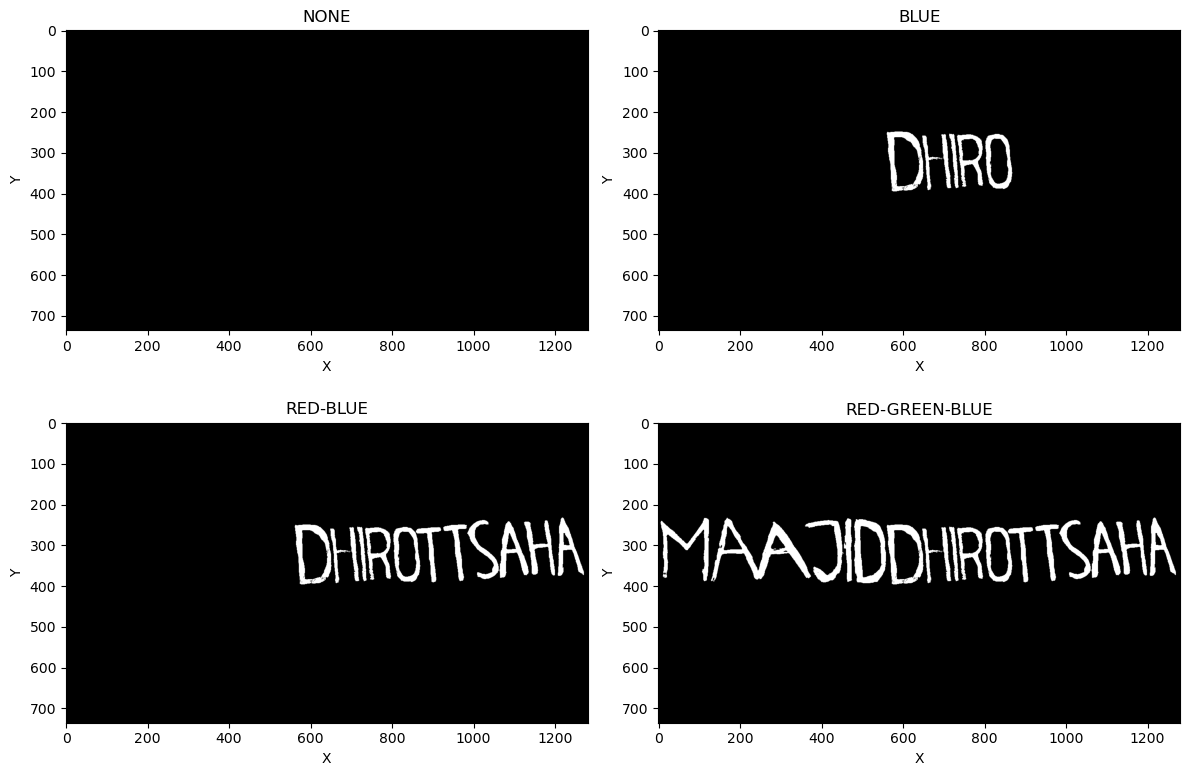

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for ax, (title, mask) in zip(axes, masks):
    ax.imshow(mask, cmap='gray')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

plt.tight_layout()
plt.show()

## ambang batas None

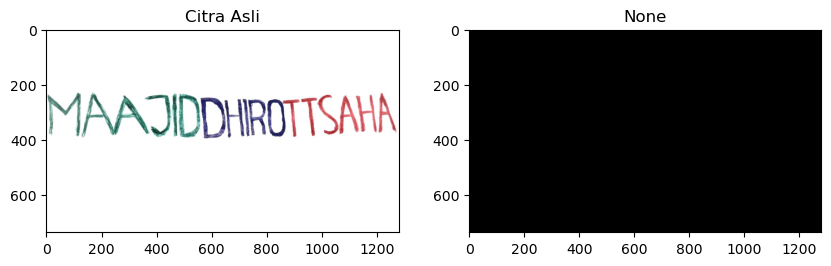

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

color_image = cv2.imread('photo1.jpeg')
if color_image is None:
    raise FileNotFoundError("photo1.jpeg tidak ditemukan!")

mask_none = np.zeros(color_image.shape[:2], dtype=np.uint8)
hasil = cv2.bitwise_and(color_image, color_image, mask=mask_none)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Citra Asli')

axs[1].imshow(mask_none, cmap='gray')
axs[1].set_title('None')

plt.show()



## ambang batas blue

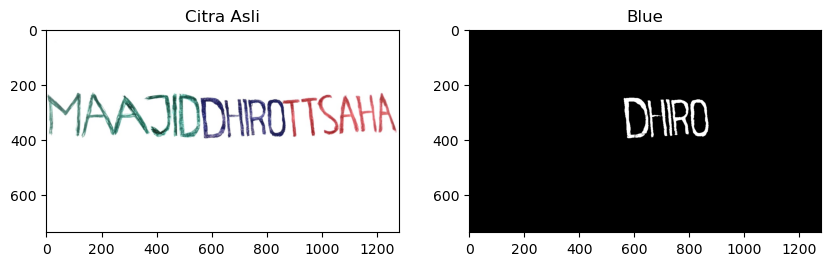

In [12]:
hsv = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

lower_blue = np.array([100, 50, 50])
upper_blue = np.array([140, 255, 255])

mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
hasil = cv2.bitwise_and(color_image, color_image, mask=mask_blue)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Citra Asli')

axs[1].imshow(mask_blue, cmap='gray')
axs[1].set_title('Blue')

plt.show()


## ambang batas red-blue

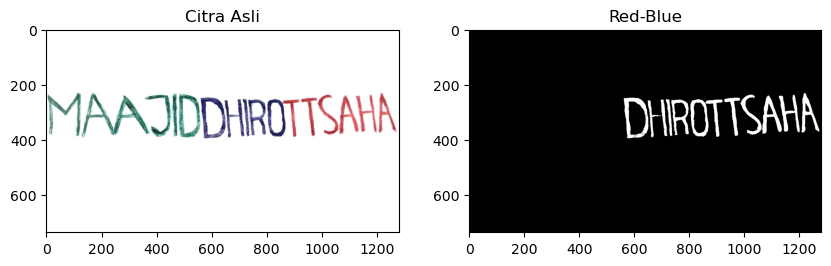

In [15]:
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 50, 50])
upper_red2 = np.array([180, 255, 255])

mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

mask_red_blue = cv2.bitwise_or(mask_red, mask_blue)
hasil = cv2.bitwise_and(color_image, color_image, mask=mask_red_blue)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Citra Asli')

axs[1].imshow(mask_red_blue, cmap='gray')
axs[1].set_title('Red-Blue')

plt.show()


## ambang batas RED-GREEN-BLUE

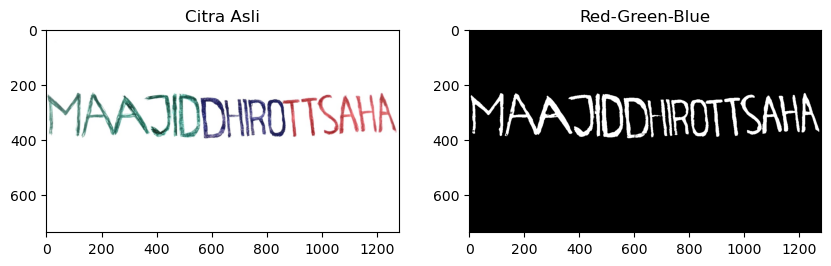

In [18]:
lower_green = np.array([30, 40, 40])
upper_green = np.array([100, 255, 255])

mask_green = cv2.inRange(hsv, lower_green, upper_green)

mask_rgb = ((mask_red > 0) | (mask_green > 0) | (mask_blue > 0)).astype(np.uint8) * 255
hasil = cv2.bitwise_and(color_image, color_image, mask=mask_rgb)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Citra Asli')

axs[1].imshow(mask_rgb, cmap='gray')
axs[1].set_title('Red-Green-Blue')

plt.show()
